<a href="https://colab.research.google.com/github/DaveAsk/Data-Science/blob/main/Simple_Neural_Network_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
n_samples = 300
n_features = 2
n_classes = 2

In [ ]:
def create_gaussian_data_1(n_samples):
    mean = [1, 1]
    cov = [[1, 0], [0, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)
    labels = np.zeros(n_samples)
    return data, labels

def create_gaussian_data_2(n_samples):
    mean = [6, 6]
    cov = [[1, 0], [0, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)
    labels = np.ones(n_samples)
    return data, labels

In [ ]:
data1, labels1 = create_gaussian_data_1(n_samples)
data2, labels2 = create_gaussian_data_2(n_samples)


data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='relu', input_shape=(n_features,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 100
best_loss = float('inf')
best_weights = None

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
loss = model.evaluate(X_test, y_test, verbose=0)[0]

Epoch 1/1000
12/12 [==============================] - 1s 31ms/step - loss: 0.6901 - accuracy: 0.4635 - val_loss: 0.6842 - val_accuracy: 0.4583
Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.4635 - val_loss: 0.6822 - val_accuracy: 0.4583
Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.5104 - val_loss: 0.6808 - val_accuracy: 0.6979
Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6849 - accuracy: 0.6719 - val_loss: 0.6791 - val_accuracy: 0.6979
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6835 - accuracy: 0.6745 - val_loss: 0.6771 - val_accuracy: 0.6979
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.6818 - accuracy: 0.6875 - val_loss: 0.6752 - val_accuracy: 0.7083
Epoch 7/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6800 - accuracy: 0.7083 - val_loss: 0.6734 - val_accuracy: 0.7083
Epoch

313/313 [==============================] - 1s 1ms/step


<ipython-input-11-088faf519466>:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=[0.5], colors='k', linestyles=['dashed'], label='SL')


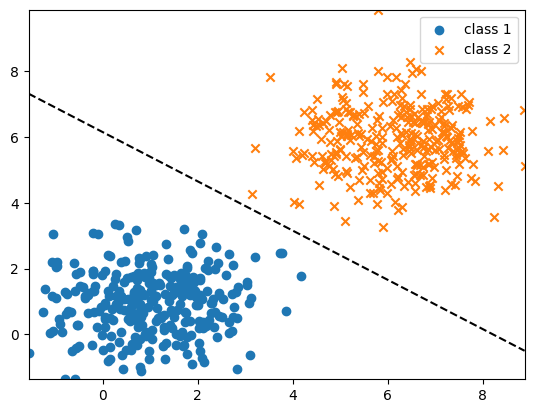

In [ ]:
plt.scatter(data1[:, 0], data1[:, 1], label='class 1', marker='o')
plt.scatter(data2[:, 0], data2[:, 1], label='class 2', marker='x')

x_line = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
y_line = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 100)
X, Y = np.meshgrid(x_line, y_line)
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=[0.5], colors='k', linestyles=['dashed'], label='SL')

plt.legend()
plt.show()
